In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib as plt
import pandas as pd

## Assembling model

In [6]:
model = keras.Sequential([
    
    # First convolutional block 
    layers.InputLayer(input_shape=[64, 64, 3]),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block 
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Flattening & output
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)       

## Loading Images

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Data augmentation for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training set
training_set = train_datagen.flow_from_directory(r'../week4/archive/training_set/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Load test set
test_set = test_datagen.flow_from_directory(r'../week4/archive/test_set/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Compiling & Fitting model

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
)

Epoch 1/20
251/251 [==============================] - 106s 421ms/step - loss: 0.6888 - binary_accuracy: 0.5428 - val_loss: 0.6802 - val_binary_accuracy: 0.5358
Epoch 2/20
251/251 [==============================] - 53s 210ms/step - loss: 0.6767 - binary_accuracy: 0.5788 - val_loss: 0.6682 - val_binary_accuracy: 0.5630
Epoch 3/20
251/251 [==============================] - 53s 212ms/step - loss: 0.6493 - binary_accuracy: 0.6292 - val_loss: 0.6128 - val_binary_accuracy: 0.6747
Epoch 4/20
251/251 [==============================] - 54s 214ms/step - loss: 0.6387 - binary_accuracy: 0.6325 - val_loss: 0.6026 - val_binary_accuracy: 0.6846
Epoch 5/20
251/251 [==============================] - 54s 216ms/step - loss: 0.5900 - binary_accuracy: 0.6857 - val_loss: 0.5830 - val_binary_accuracy: 0.6990
Epoch 6/20
251/251 [==============================] - 52s 206ms/step - loss: 0.5589 - binary_accuracy: 0.7138 - val_loss: 0.5584 - val_binary_accuracy: 0.7197
Epoch 7/20
251/251 [=========================

## Graphing results

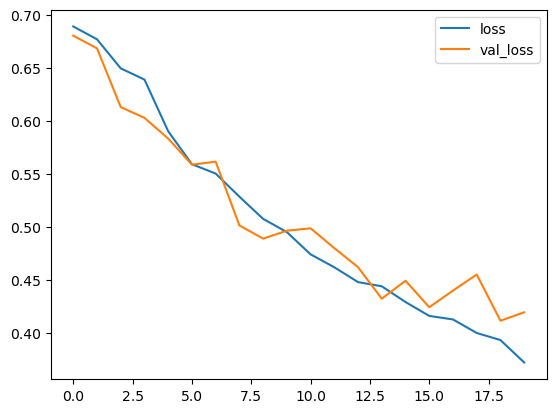

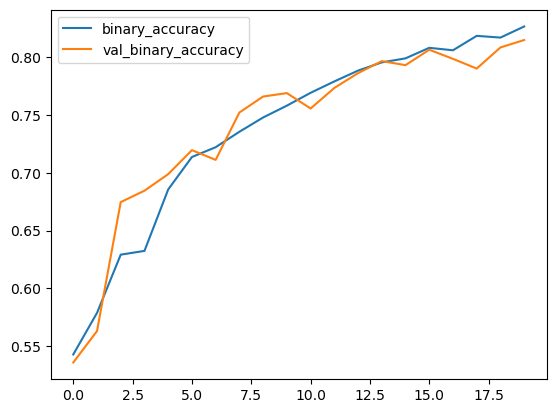

In [12]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()